In [1]:
## fit linear regression model with random fold validation
## create plot mirroring figure 2C from Yuan et al., 2021, Cell Systems 12, 128–140
## but using linear regression instead of cellbox model
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import ast 
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#change to your own data directory
df = pd.read_csv("../data/expert.csv")
#df = df.iloc[:,1:]
df.head()

,4EBP1pS65,RbpS807,MAPKpT202,MEKpS217,S6,PAI-1,AKTpS473,AMPKpT172,b-Catenin,BIM,...,aHDAC,aMDM2,aJAK,aBRAFm,aPKC,aSTAT3,amTOR,aPI3K,aCDK4,aSRC
0,-0.435,-0.608,-0.855,-0.712,-0.113,-0.089,0.096,0.291,0.428,0.375,...,0.00,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.308,-0.322,-0.999,-0.594,0.022,-0.061,0.093,0.222,0.255,0.645,...,-0.89,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.402,-0.549,-0.837,-0.675,-0.011,-0.103,0.089,0.418,0.276,0.439,...,0.00,-0.393,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.475,-0.652,-0.935,-0.751,-0.085,-0.019,0.064,0.207,0.147,0.416,...,0.00,0.000,-0.474,0.000,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.611,-1.097,-1.234,-0.928,-0.114,-0.113,-0.002,-0.042,0.277,0.732,...,0.00,0.000,0.000,-0.552,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
"""
repreat the process 1000 times,Ys are the first 87 columns, Xs are the last 12 columns, 
Split training and testing by 70% and 30%
everytime, assign the X_test index to y_hat in order to store the rows used in X_test to
calcualte the average of Y_hat for each row
the final "new_df dataframe contains all rows for X_test(1000*89*30%)"
"""
new_df = pd.DataFrame()
for _ in range(1000):
  Y = df.iloc[:,:-12]
  X = df.iloc[:,-12:]
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)
  lr = LinearRegression().fit(X_train, Y_train)
  y_hat = lr.predict(X_test)
  y_hat = pd.DataFrame(y_hat)
  #df = df.reindex(np.random.permutation(df.index))
  y_hat.index = X_test.index
  new_df = pd.concat([new_df, y_hat],axis = 0)
print(new_df.shape)

(27000, 87)


In [4]:
# calculate the average by row
df2 = new_df.groupby(new_df.index).mean()
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,-0.318390,-0.597121,-0.782037,-0.553313,-0.047239,-0.121027,0.117342,0.038473,0.404726,0.463964,...,-0.103883,0.008220,0.135443,0.066280,0.186918,0.041859,0.458245,0.002226,0.027747,0.196412
1,-0.444064,-0.502864,-0.999089,-0.492878,-0.190785,0.056168,0.123486,0.042960,0.103858,0.574714,...,-0.120703,0.011470,0.206977,-0.055326,0.051706,-0.033285,0.363560,1.489857,-0.126683,0.297834
2,-0.454738,-0.626603,-0.878257,-0.622706,-0.177026,-0.067245,0.023502,0.022775,0.245417,0.413540,...,-0.064138,0.000265,0.078578,0.043002,0.240987,0.212971,0.389015,0.155926,0.080774,0.260588
3,-0.288629,-0.659191,-0.930752,-0.561528,-0.062523,-0.109766,0.069096,0.122435,0.227809,0.437011,...,-0.073207,-0.021805,0.096527,0.053858,0.186007,0.219613,0.427122,0.058691,0.045385,0.462348
4,-0.367451,-0.863446,-1.346829,-1.107585,-0.110141,-0.223534,0.316425,0.297972,0.416744,0.572236,...,-0.040758,0.009360,0.196830,0.076061,0.287542,-0.155745,0.687491,-0.021914,-0.002894,0.663853


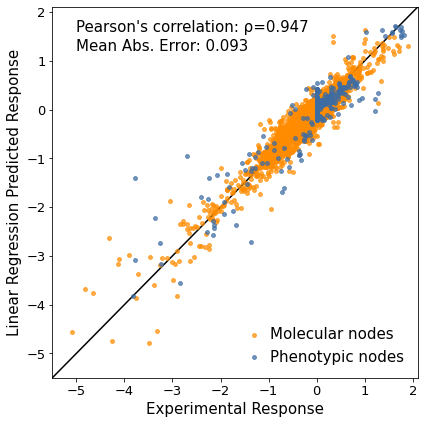

In [10]:
#only keep all Ys columns for ploting
df_y = df.iloc[:,:-12]

x_all = df_y.values.flatten()
y_all = df2.values.flatten()

x_prot = df.iloc[:,0:82]
y_prot = df2.iloc[:,0:82]
x_pheno = df.iloc[:,82:87]
y_pheno = df2.iloc[:,82:87]
plt.scatter(x_prot, y_prot, s = 15, alpha = 0.7, color="darkorange",zorder=3)
#plt.scatter(x_prot, y_prot, s = 15, alpha = 0.7, color="#FC5A5B",zorder=3)
plt.scatter(x_pheno, y_pheno, s = 15, alpha = 0.7, color="#3D6CA3",zorder=4)
#plt.scatter(x_pheno, y_pheno, s = 15, alpha = 0.7, color="#FECD7F",zorder=4)
plt.legend(["Molecular nodes","Phenotypic nodes"], loc="lower right", frameon=False,
          handletextpad=0.1,prop={'size': 15})
plt.plot([-10, 10], [-10, 10], c = 'white', alpha = 0, ls = '--')
#plt.scatter(x_all, y_all, s = 15, alpha = 0.6)
#sns.regplot(x_all, y_all, scatter_kws={'s': 15, 'alpha': 0},line_kws={'color': 'black', 'alpha': 1})
#sns.regplot(x_all, y_all, scatter_kws={'s': 15, 'alpha': 0},line_kws={'color': '#F18A64', 'alpha': 1})
plt.plot( [-6,3],[-6,3],color='black')


plt.xticks(np.arange(-6,3),size=13)
plt.yticks(np.arange(-6,3),size=13)
#plt.grid(True, which='both')

ll = [-5.5, 2.1]
plt.xlim(ll)
plt.ylim(ll)

r = np.corrcoef(x_all, y_all)[0][1]
mae = np.mean(np.absolute(x_all-y_all))
plt.text(x = -5, y= 1.6, s='Pearson\'s correlation: ρ=%1.3f'%r,
        size = 15)
plt.text(x = -5, y= 1.2, s='Mean Abs. Error: %1.3f'%mae,
        size = 15)
plt.xlabel('Experimental Response',size=15)
plt.ylabel('Linear Regression Predicted Response',size=15)

plt.rcParams['figure.figsize'] = 6, 6
plt.tight_layout()
plt.savefig('LR_RF.pdf')


0.09289712407601097